In [2]:
% md

# 综合提升之芯片品质预测

UsageError: Line magic function `%` not found.


In [3]:
#import data
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
data.head()

,x1,x2,y
0,9.23,3.97,0
1,8.29,2.81,0
2,7.82,1.31,0
3,6.20,0.69,0
4,4.79,1.14,0


In [4]:
#X y赋值
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()
y.head()
#数据格式预处理

x1 = X.loc[:,'x1']
x2 = X.loc[:,'x2']

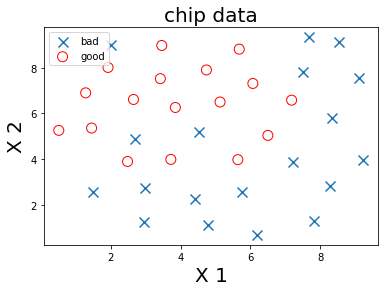

In [5]:

#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
bad = plt.scatter(x1[y==0],x2[y==0],marker='x',s=100,label='bad')
good = plt.scatter(x1[y==1],x2[y==1],marker='o',facecolor='none',
                   edgecolor='red',s=100,label='good')
plt.title('chip data',fontsize=20)
plt.xlabel('X 1',fontsize=20)
plt.ylabel('X 2',fontsize=20)
plt.legend()
plt.show()


In [6]:
import math
#筛选y为0的数据
x10 = x1[y==0]
x20 = x2[y==0]
#计算mean，std
u1 = x10.mean()
u2 = x20.mean()
std1 = x10.std()
std2 = x20.std()
print(u1,std1,u2,std2)



5.872105263157895 2.5681977661546767 4.4126315789473685 2.9169234974641487


In [7]:

#计算高斯分布的概率密度函数
p1 = 1/std1/math.sqrt(2*math.pi)*np.exp(-np.power((x10-u1),2)/2/math.pow
(std1,2))
p2 = 1/std2/math.sqrt(2*math.pi)*np.exp(-np.power((x20-u2),2)/2/math.pow
(std2,2))
p = np.multiply(p1,p2)
print(p)
print('max p:',max(p))
print('min p:',min(p))
print('max/min:',max(p)/min(p))

0     0.008934
1     0.011729
2     0.009050
3     0.009334
4     0.010360
5     0.017426
6     0.018206
7     0.011982
8     0.005428
9     0.003318
10    0.003993
11    0.008846
12    0.013695
13    0.006155
14    0.009603
15    0.004068
16    0.009740
17    0.017871
35    0.001980
dtype: float64
max p: 0.01820586881510458
min p: 0.001979598419462152
max/min: 9.196748510261507


In [8]:
import math
#筛选y为1的数据
x11 = x1[y==1]
x21 = x2[y==1]
#计算mean，std
u1 = x11.mean()
u2 = x21.mean()
std1 = x11.std()
std2 = x21.std()
print(u1,std1,u2,std2)


#计算高斯分布的概率密度函数
p1 = 1/std1/math.sqrt(2*math.pi)*np.exp(-np.power((x11-u1),2)/2/math.pow
(std1,2))
p2 = 1/std2/math.sqrt(2*math.pi)*np.exp(-np.power((x21-u2),2)/2/math.pow
(std2,2))
p = np.multiply(p1,p2)
print(p)
print('max p:',max(p))
print('min p:',min(p))
print('max/min:',max(p)/min(p))

3.8635294117647057 1.9833114391607491 6.405882352941177 1.617065470317797
18    0.012190
19    0.014357
20    0.010784
21    0.016214
22    0.011710
23    0.019200
24    0.040827
25    0.049422
26    0.040404
27    0.022859
28    0.010804
29    0.029370
30    0.038174
31    0.013827
32    0.018771
33    0.020275
34    0.009243
dtype: float64
max p: 0.04942244529970458
min p: 0.00924331025588934
max/min: 5.346833973058002


In [9]:

#异常数据点对点检测
from sklearn.covariance import EllipticEnvelope
#异常点的比例为0.02
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(X[y==0])
y_predict_bad = ad_model.predict(X[y==0])
print(y_predict_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


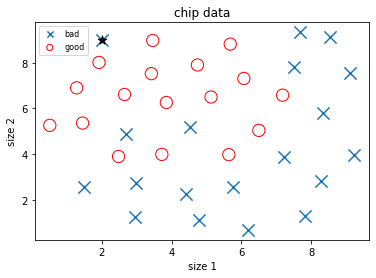

In [10]:

fig2 = plt.figure()
bad = plt.scatter(x10,x20,marker='x',s=150,label='bad')
good = plt.scatter(x11,x21,marker='o',facecolor='none',
                   edgecolor='red',s=150,label='good')
plt.scatter(x10[y_predict_bad==-1],x20[y_predict_bad==-1],
            marker='*',s=80,c= 'k')
plt.title('chip data')
plt.xlabel('size 1')
plt.ylabel('size 2')
plt.legend(fontsize=8,markerscale=0.5)
plt.show()

In [11]:

#剔除异常数据点
print(data.shape)
data = data.drop(index=35)
print(data.shape)


(36, 3)
(35, 3)


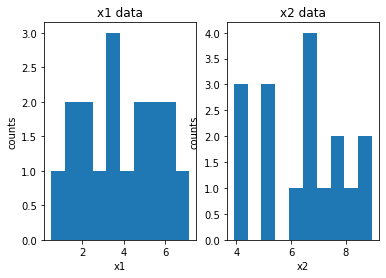

In [12]:

#各维度数据分布
fig3 = plt.figure()
plt.subplot(121)
plt.hist(x11,bins=10)
plt.title('x1 data')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(x21,bins=10)
plt.title('x2 data')
plt.xlabel('x2')
plt.ylabel('counts')

plt.show()

In [13]:
#主成分分析#X y赋值
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
print(X.shape)

(35, 2)


[0.5369408 0.4630592]


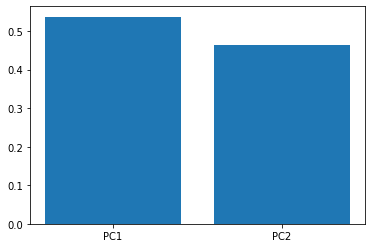

In [14]:

#主成分分析
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X)
#主成分分析（二维）
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)
fig4 = plt.figure()
plt.bar([1,2],var_ratio)
plt.xticks([1,2],['PC1','PC2'])
plt.show()
#从结果我们可以看到，两个成分保留的信息都很多，都要保留

In [15]:
#数据分离
from  sklearn.model_selection import train_test_split
#数据分离，数据分离参数：random_state=1,test_size=0.4
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.4)
print(X_train.shape,X_test.shape,X.shape)




(21, 2) (14, 2) (35, 2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:

#模型预测
y_train_predict = knn_3.predict(X_train)
y_test_predict = knn_3.predict(X_test)
print(y_train_predict,y_test_predict)

[1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0] [0 1 0 1 1 0 0 1 1 1 1 1 0 0]


In [18]:
#粗略判断准确率
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_test = accuracy_score(y_test,y_test_predict)
print('训练：',accuracy_train,'\n测试: ',accuracy_test)

训练： 0.8095238095238095 
测试:  0.7857142857142857


In [19]:

#结果可视化
#生成用于结果可视化的数据集
xx,yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
#数据展开
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)
print(x_range)

(40000, 2)
[[0.   0.  ]
 [0.05 0.  ]
 [0.1  0.  ]
 ...
 [9.85 9.95]
 [9.9  9.95]
 [9.95 9.95]]


In [20]:
print(1)


1
